In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Import curve fit
from scipy.optimize import curve_fit, minimize

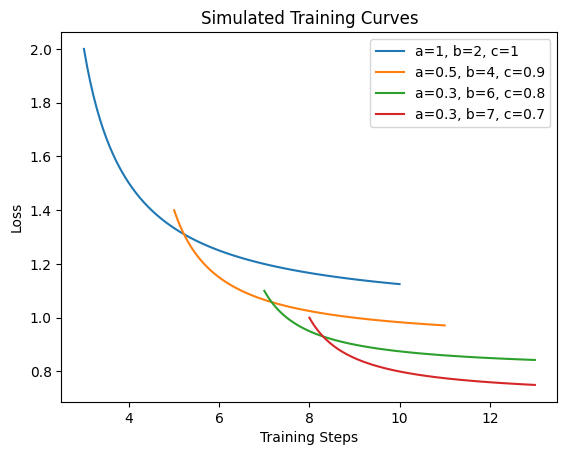

In [39]:
def simulate_training_curve(x, a, b, c):
    return a / (x - b) + c

training_curve_parameters = [
    {'start': 3, 'end': 10, 'a': 1, 'b': 2, 'c': 1},
    {'start': 5, 'end': 11, 'a': 0.5, 'b': 4, 'c': 0.9},
    {'start': 7, 'end': 13, 'a': 0.3, 'b': 6, 'c': 0.8},
    {'start': 8, 'end': 13, 'a': 0.3, 'b': 7, 'c': 0.7}
]

x_list = [
    np.linspace(params['start'], params['end'], 100) for params in training_curve_parameters
]

y_list = [
    simulate_training_curve(x, params['a'], params['b'], params['c']) for x, params in zip(x_list, training_curve_parameters)
]

fig, ax = plt.subplots()

for x, y, params in zip(x_list, y_list, training_curve_parameters):
    ax.plot(x, y, label=f"a={params['a']}, b={params['b']}, c={params['c']}")
ax.set_xlabel('Training Steps')
ax.set_ylabel('Loss')
ax.set_title('Simulated Training Curves')
ax.legend()

In [40]:
def scaling_law(x, a, b):
    return a * x + b

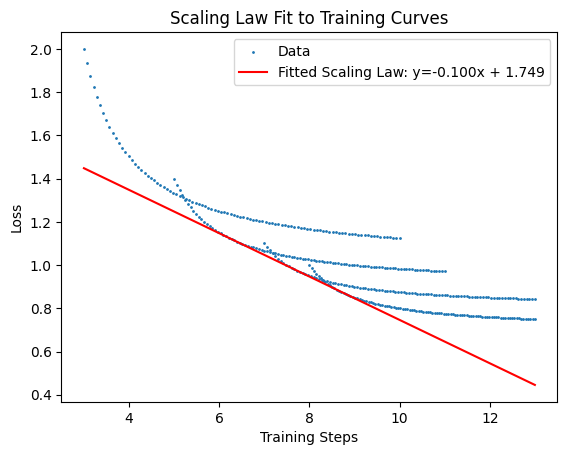

In [64]:
x_all = np.concatenate(x_list)
y_all = np.concatenate(y_list)

def objective(params, x, y, penalty_weight=1.0):
    y_pred = scaling_law(x, *params)
    overshoot_penalty = np.sum((y_pred - y).clip(min=0))**2
    integral_term = - np.mean(y_pred / x)
    return penalty_weight * overshoot_penalty + integral_term

result = minimize(objective, x0=[-0.15, 2], args=(x_all, y_all, 10))


a_fit, b_fit = result.x

x_fit = np.linspace(min(x_all), max(x_all), 100)
y_fit = scaling_law(x_fit, a_fit, b_fit)
fig, ax = plt.subplots()
ax.scatter(x_all, y_all, s=1, label='Data')
ax.plot(x_fit, y_fit, color='red', label=f'Fitted Scaling Law: y={a_fit:.3f}x + {b_fit:.3f}')
ax.set_xlabel('Training Steps')
ax.set_ylabel('Loss')
ax.set_title('Scaling Law Fit to Training Curves')
ax.legend()
